### Section 1: Data Loading and Exploration

In [2]:
%pip install torch

  Using cached torch-2.3.0-cp310-cp310-manylinux1_x86_64.whl (779.1 MB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 532.8 kB/s eta 0:00:0000:0100:01
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached sympy-1.12.1-py3-none-any.whl (5.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 KB 5.3 MB/s eta 0:00:00a 0:00:01
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)

In [3]:
%pip install torchvision

  Using cached torchvision-0.18.0-cp310-cp310-manylinux1_x86_64.whl (7.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [5]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


In [6]:
# Load the training and test datasets
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 872188.86it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 105379.00it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 893601.18it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2889508.38it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [15]:
# Display the size and shape of the datasets
print(f"Training dataset size: {len(trainset)}")
print(f"Test dataset size: {len(testset)}")

Training dataset size: 60000
Test dataset size: 10000


In [7]:
# Create DataLoader objects
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

In [16]:
# Display the shape of a single batch of data
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(f"Shape of a batch of images: {images.shape}")
print(f"Shape of a batch of labels: {labels.shape}")

Shape of a batch of images: torch.Size([64, 1, 28, 28])
Shape of a batch of labels: torch.Size([64])


#### Visualize the dataset

In [17]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [18]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

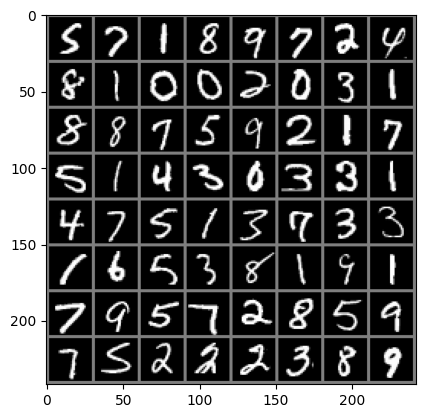

    5     7     1     8     9     7     2     4


In [20]:
# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%5s' % labels[j].item() for j in range(8)))

#### Justification for preprocessing steps

Above are the 8 images from the training set along with their labels.

The ToTensor() transform converts the images from PIL format (which is the format in which the dataset is originally loaded) to PyTorch tensors, which are the required input format for the neural network.

Normalization scales the pixel values from the range [0, 1] to [-1, 1]. This helps to stabilize and speed up the training process by ensuring that the input values to the neural network have similar scales.

The images are flattened into 1D vectors before feeding them into the fully connected neural network. Each 28x28 image is converted to a 784-element vector.


### Section 2: Model Design and Training

#### Build the Neural Network

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = Net()

#### Define the loss function and optimizer

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Train the model

In [24]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        
        # Forward pass, get our logits
        output = model(images)
        
        # Calculate the loss
        loss = criterion(output, labels)
        
        # Backward pass
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.05904134454851998
Training loss: 0.05405751897629275
Training loss: 0.050452206148620775
Training loss: 0.04413159794641037
Training loss: 0.03724147262497443


### Section 3: Model Testing and Evaluation


In [25]:
correct = 0
total = 0

# Turn off gradients for validation, saves memory and computations
with torch.no_grad():
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


Accuracy of the network on the 10000 test images: 97.82%


#### Save the model

In [26]:
torch.save(model.state_dict(), 'mnist_model.pth')